In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path
import datetime as dt
import pmdarima as pm
import os 

In [27]:
file = 'trajets_valid.csv'
df = pd.read_csv(file,sep=";",index_col=[0]) 


In [28]:
traj = df[df['traj']==1498] #3500
print(traj.shape)
AR = [1.1819,-0.382,0.011,0.099]

(1354, 27)


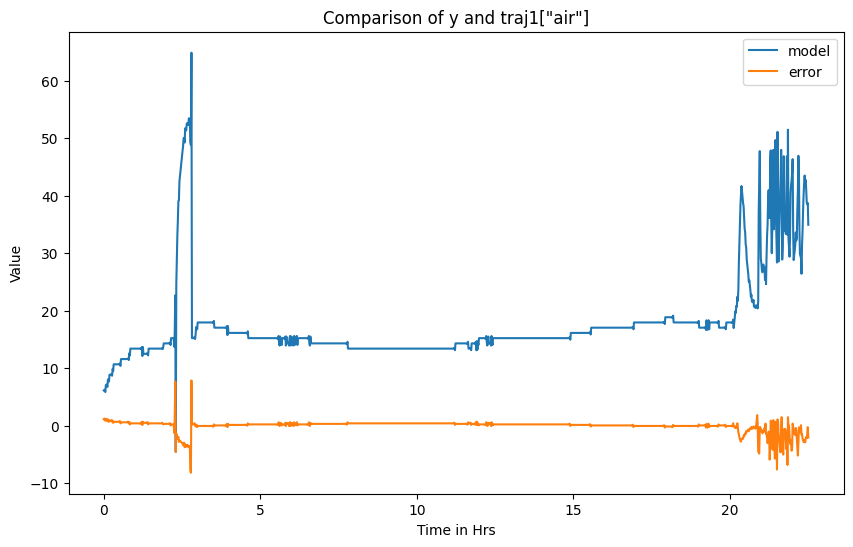

-141.99999999999852

In [31]:
testing=traj['RS_E_InAirTemp_PC2']

# -1/60
time_range = np.arange(0, (testing.shape[0]/60)  , 1/60) #time in hours
dtest = testing-testing.shift(1).fillna(0)
y = AR[0]*dtest.shift(0)

for p in range(len(AR)):
    if p>0:
        y = y+AR[p]*dtest.shift(-p)

y = y.cumsum()
y = y - np.mean(y-testing)
plt.figure(figsize=(10, 6))
plt.plot(time_range,y, label='model')
# plt.plot(time_range,testing, label='testing')
plt.plot(time_range,y-testing, label='error')

plt.xlabel('Time in Hrs')
plt.ylabel('Value')
plt.title('Comparison of y and traj1["air"]')
plt.legend()
plt.show()
sum(y.fillna(0)-testing)